# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Для этого:
1. Изучим общую информацию;
2. Подготовим данные;
3. Проведём исследовательский анализ данных, проанализируем:
- выпуск игр в разные годы;
- изменение продаж по платформам;
- определим актуальный период;
- выберем потенциально прибыльные платформы;
- определим влияние отзывов пользователей и критиков на продажи;
- определим самые популярные жанры;
4. Составим портрет пользователя каждого региона (самые популярные платформы, жанры, влияние рейтинга на продажи);
5. Проверим гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные";
6. Сделаем общий вывод.

## Общая информация

Загрузим библиотеки, выведем первые 5 строк датасета и общую информацию:

In [1]:
#загрузка библиотек

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#сохранение датасета в переменной

data = pd.read_csv('/datasets/games.csv')

In [3]:
#первые 5 строк датасета

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#общая информацию

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Преобразуем названия столбцов

Названия столбцов состоят из букв разного регистра. Приведем к единому регистру:

In [5]:
#приведение названий столбцов к единому регистру

data.columns = data.columns.str.lower()

In [6]:
#общая информация

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Выведем количество пропусков в столбцах:

In [7]:
#количество пропусков в столбцах

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах с названием и жанром, возможно, техническая ошибка.\
Скорее всего, пропуски в столбце "Год выпуска" означают, что игра так и не была выпущена. \
Строки с перечисленными пропусками составляют менее 1% массива, их можно удалить:

In [8]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre'])

Проверим предположение, что у игр без оценки пользователей также отсутствуют  оценка критиков и рейтинг:

In [9]:
data_without_user_score = data[data['user_score'].isna()]
print('Сколько видов рейтингов у игр без оценки пользователей:', data_without_user_score['rating'].nunique())
print('Сколько разных оценок критиков у игр без оценки пользователей:', data_without_user_score['critic_score'].nunique())

Сколько видов рейтингов у игр без оценки пользователей: 4
Сколько разных оценок критиков у игр без оценки пользователей: 23


Предположение ошибочное (помимо пропусков есть другие значения в столбцах). \
Пропуски в столбцах "оценка критиков", "оценка пользователей" могут означать, что игра не получила данные оценки ввиду того, что мало популярны или вышли относительно недавно, и ещё не получили оценок. \
Рейтинг может отсутствовать у игр без возрастных ограничений. \
Ознакомимся с уникальными значениями в столбцах с оценками критиков, оценками пользователей и рейтингом:

In [10]:
#уникальные значения столбца оценки критиков

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце изначально нет значения "0", поэтому заполним пропуски нулями:

In [11]:
data['critic_score'] = data['critic_score'].fillna(value=0)

In [12]:
#уникальные значения столбца оценки пользователей

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски могли возникнуть из-за технического сбоя при выгрузке данных. Выведем строки с оценками пользователей "0":

In [13]:
#строки с нулевой оценкой пользователей

data.loc[data['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,0.0,0,E


Всего одна строка с нулевой оценкой. Так как рейтинг важен для исследования, играм с пропусками присвоим оценку пользователей "0".\
Аббривеатура TDB в мире игр расшифровывается как To Be Determined и означает "будет определено". Раз оценка пользователей не определена, то заменим также эти значения на нулевые:

In [14]:
#замена пропусков и строк с ценкой "tbd" на нулевую оценку

data['user_score'] = data['user_score'].fillna(value=0)
data['user_score'] = data['user_score'].replace('tbd', 0)

Выведем уникальные значения столбца с рейтингом:

In [15]:
#уникальные значения рейтинга

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги K-A и E10+ являются идентичными, поэтому объединим их в одно название:

In [16]:
data['rating'] = data['rating'].replace('K-A', 'E10+')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

В случае с рейтингом пропуски оставим незаполненные.\
Проверим повторно количество пропусков в столбцах:

In [17]:
#количество пропусков в столбцах

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

### Изменение типов данных

Мы обнаружили столбцы, тип данных которых не соответствует содержимому:
- Год выпуска (преобразуем в целочисленный тип, не может быть дробным);
- Оценка критиков (преобразуем в целочисленный тип, избавились от пропусков, оставшиеся значения - целые);
- Оценка пользователей (преобразуем в вещественный тип, избавились от пропусков и текста, оставшиеся значения - дробные).

In [18]:
#изменение типов данных

data['year_of_release'] = data['year_of_release'].astype('int64')
data['critic_score'] = data['critic_score'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

### Поиск дубликатов

Проверим наличие явных дубликатов:

In [19]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


А также дубликатов среди названий игр:

In [20]:
#количество строк с каждым названием игры, топ-5

data['name'].value_counts().head()

Need for Speed: Most Wanted    12
FIFA 14                         9
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA Soccer 13                  8
Name: name, dtype: int64

In [21]:
#таблица с наиболее часто встречающимся названием

data.loc[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,0,0.0,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,0,0.0,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,0,0.0,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


Одна и та же игра выходит на разных платформах, и на одной и той же платформе может выйти в разные годы, анализировать и удалять дубликаты не имеет смысла.

### Добавление столбца

Добавим столбец с суммарными продажами по всех регионах:

In [22]:
#добавим столбец и выведем первые 10 строк

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN,28.31


## Исследовательский анализ данных

### Анализ выпуска игр по годам

Для того, чтобы определить актуальный период, посмотрим распределение выпуска игр по годам:

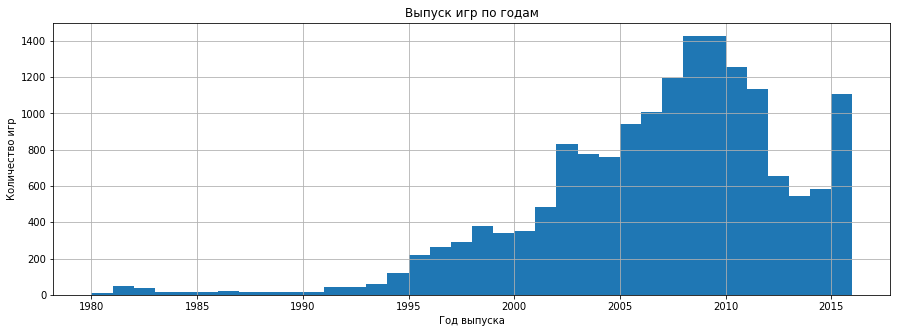

In [23]:
data['year_of_release'].plot(kind='hist', x='year_of_release', figsize=(15,5), bins=36, grid=True, \
                        title='Выпуск игр по годам');

plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');
plt.title('Выпуск игр по годам');

На графике видно, что пик выпуска игр приходится на 2009-2010 гг, но этот период не является актуальным: сфера игр и игровых платформ развивается и меняется с очень быстрой скоростью. Увеличение количества выпущенных игр наблюдается в последнем, 2016 году. Для определения актуального периода продолжим анализ.

### Анализ продаж по платформам

Чтобы посмотреть изменение продаж по платформам, выберем платформы с наибольшими суммарными продажами (топ-10) и построим распределение по годам.

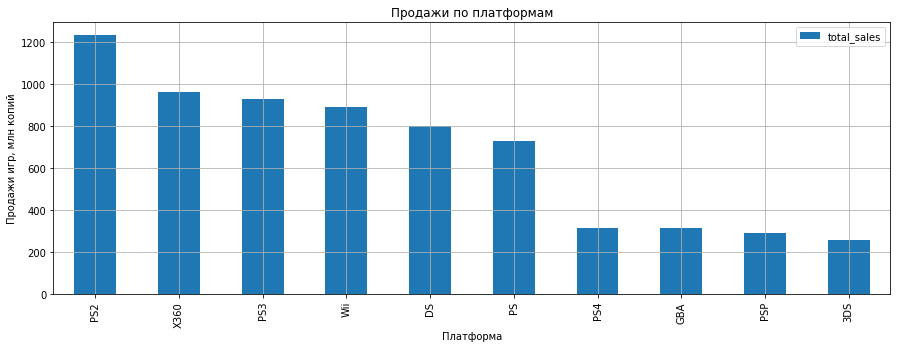

In [24]:
#сводная таблица продаж по платформам

platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')

#сортировка и вывод топ-10 платформ

platforms = platforms.sort_values('total_sales',ascending=False)

platforms.head(10).plot(grid=True, figsize=(15,5), kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн копий')
plt.title('Продажи по платформам');


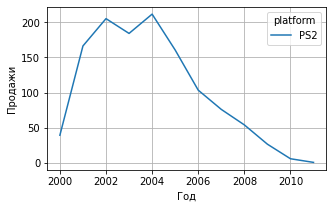

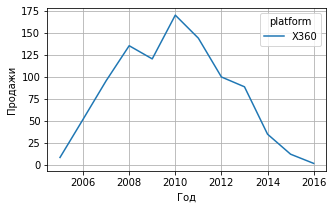

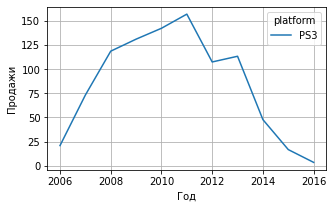

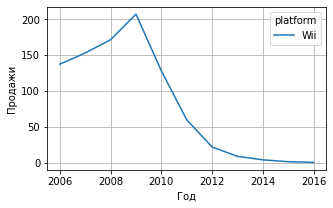

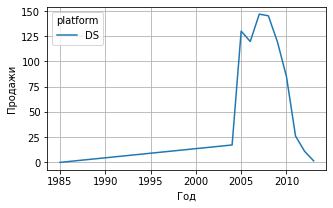

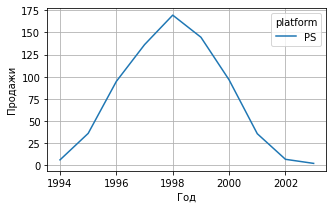

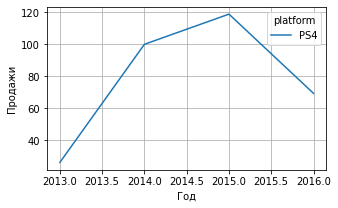

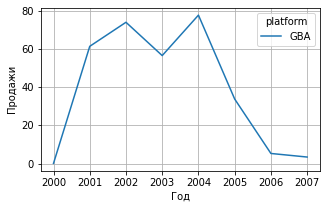

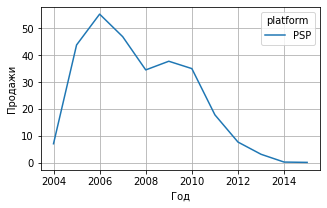

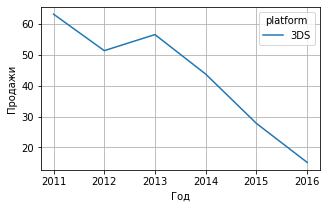

In [25]:
#список топ-10 платформ

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

#сводная таблица топ-10 платформ и распределение продаж по годам
for platform in top_platforms:
    platforms = data.loc[data['platform']==platform].pivot_table(index='year_of_release',
                                                                      columns='platform',
                                                                      values='total_sales',
                                                                      aggfunc='sum')
    platforms.plot(grid=True, figsize=(5,3))
    plt.xlabel('Год')
    plt.ylabel('Продажи')

Согласно графикам выше, средняя продолжительность "жизни" платформы составляет 8-11 лет, при чем спад значительно "плавнее", чем рост.

К 2016 году самой популярной платформой являлась PS4, остальные платформы находились на спаде. Однако в свое время популярность PS, PS2, Wii, 3DS и PS3 значительно превышала текущие показатели PS4, возможно, если дополнить данные за весь 2016 год, продажи PS4 были бы существенно выше.

### Определение актуального периода

Перед нами стоит задача определить актуальный период. Жизненный цикл платформы составляет около 10 лет, из них 2-3 года приходится на рост популярности платформы. Определим актуальным период с 2014 по 2016 год включительно (помним, что 2016 год предоставлен не полностью).

In [26]:
data_for_forecast = data.query('year_of_release >= 2014')
data_for_forecast.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,0.0,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


### Определение потенциально прибыльных платформ

Чтобы определить потенциально прибыльные платформы выведем таблицу по общим продажам за актуальный период и построим график по продажам.

In [27]:
#сводная таблица продаж по платформам

data_for_forecast.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
.sort_values('total_sales',ascending=False).head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


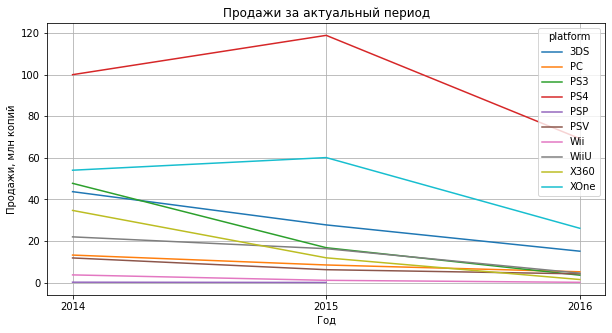

In [28]:
#график по продажам

platforms = data_for_forecast.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platforms.plot(grid=True, figsize=(10,5))
plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи за актуальный период');

В 2015 году относительно 2014 года виден рост популярности платформ PS4 и XOne. Так как данные за 2016 год неполные, и предположить продолжился ли рост в 2016 году возможности нет, остановимся на том, что потенциально прибыльными платформами являются PS4 и XOne.

### График «ящик с усами» 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

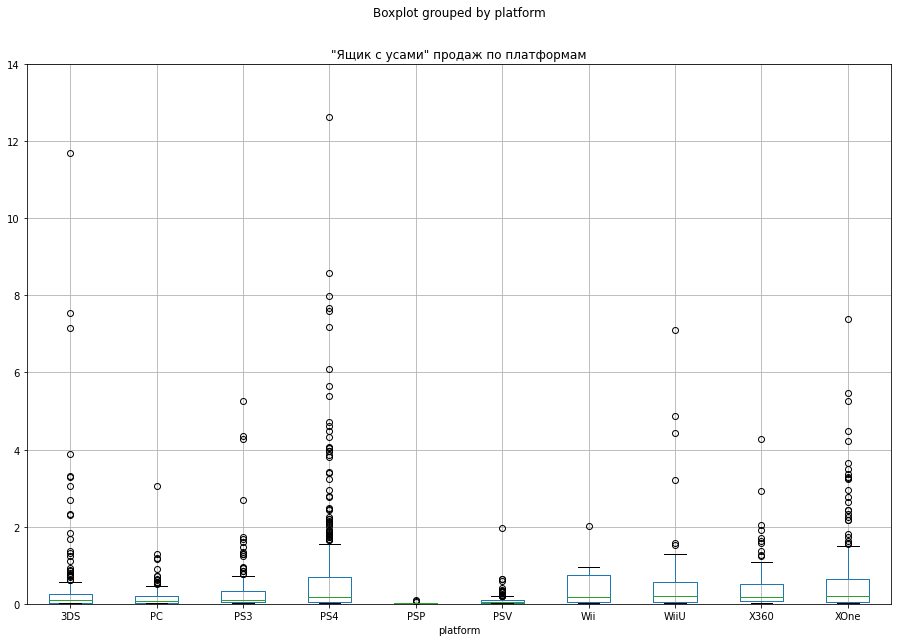

In [29]:
#график «ящик с усами»  

data_for_forecast.boxplot('total_sales', by='platform',figsize=(15, 10)).set_ylim(0, 14)
plt.title('"Ящик с усами" продаж по платформам');

Согласно графику выше видно, что больший "разброс" выбросов приходится на PS4, далее на XOne, 3DS и PC. Скорее всего, на этих платформах чаще выходят игры, получающие всеобщее признание.
Для детального анализа масштабируем график:

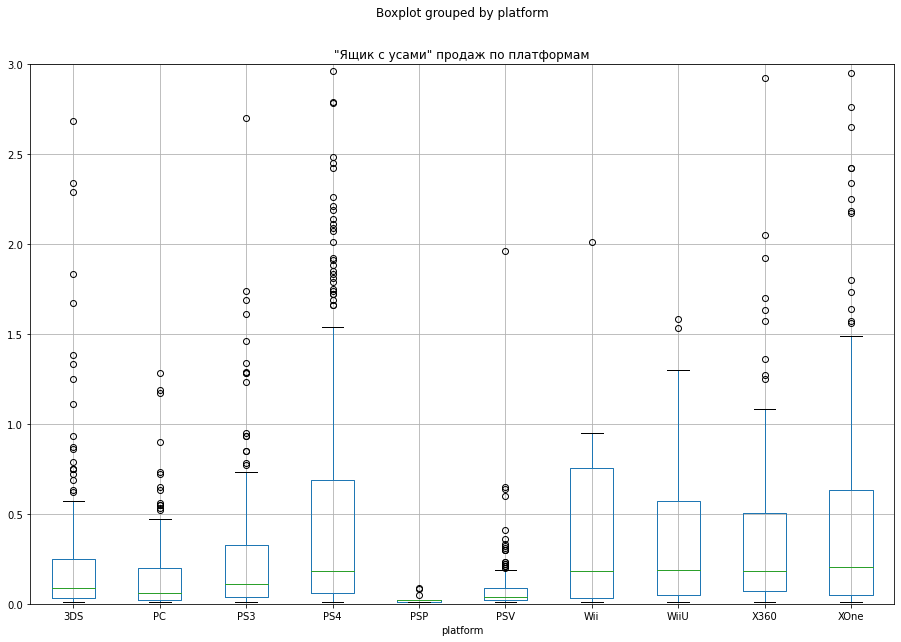

In [30]:
#график «ящик с усами»  

data_for_forecast.boxplot('total_sales', by='platform',figsize=(15, 10)).set_ylim(0, 3)
plt.title('"Ящик с усами" продаж по платформам');

Выше всего медианы находятся WiiU, XOne, и примерно на одном уровне PS4 и 3DS. Половина всех продаж находится под, а половина - над границей медианы, что позволяет сделать предположение, что, несмотря на большую разницу расположения верхних границ усов у PS4 и XOne (в районе 2.2-2.3 млн копий), WiiU (1.6 млн), 3DS и PS3 (0,9 млн), наиболее частовстречающееся количество продаж по играм у всех вышеперечисленных платформ не превышает 0.3 млн копий.

### Влияние отзывов на продажи

На примере PS4 посмотрим, как влияют на продажи отзывы пользователей и критиков. Для начала уберем из данных игры без отзывов:

In [31]:
#убираем игры без отзывов пользователей и критиков (те, которые мы заменили 0)

data_without_zero_score = data_for_forecast.loc[data_for_forecast['user_score']!=0]
data_without_zero_score = data_without_zero_score.loc[data_without_zero_score['critic_score']!=0]

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

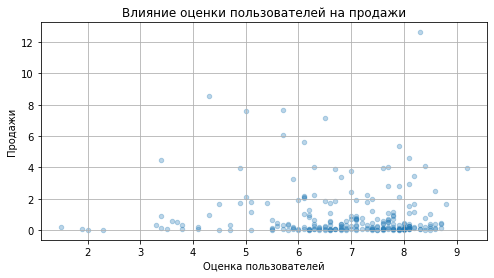

Корреляция отсутствует, коэффициент: -0.043


In [32]:
#корреляция отзывов пользователей и продаж

data_for_forecast_PS4 = data_without_zero_score.loc[data_without_zero_score['platform']=='PS4']

data_for_forecast_PS4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,4), grid=True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценки пользователей на продажи');
plt.show()


score_corr = data_for_forecast_PS4['user_score'].corr(data_for_forecast_PS4['total_sales'])
if abs(score_corr) <= 0.3:
    type_of_corr = 'Корреляция отсутствует, коэффициент:'
elif 0.3 < abs(score_corr) <= 0.5:
    type_of_corr = 'Корреляция слабая, коэффициент:'
elif 0.5 < abs(score_corr) <= 0.7:
    type_of_corr = 'Корреляция средняя, коэффициент:'
else:
    type_of_corr = 'Корреляция сильная, коэффициент:'
    
    
print(type_of_corr, score_corr.round(3))

По коэфициенту корреляции, а также на графике видно, что наличие высокой оценки пользователей не гарантирует больших продаж, как и наоборот (видно точку в районе оценки 4 с продажами чуть меньше 9 млн копий). Возможно, это связано с тем, что пользователи сначала приобретают игру, а уже после ознакомления пишут отзывы и ставят оценки. В любом случае, даже если игра получила низкую оценку, она уже куплена. 

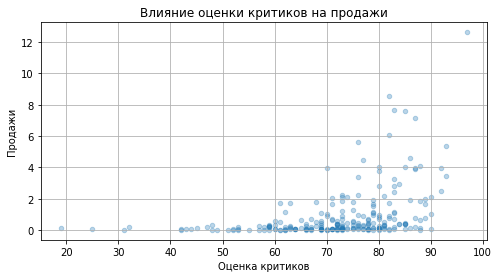

Корреляция слабая, коэффициент: 0.402


In [33]:
#корреляция отзывов критиков и продаж

data_for_forecast_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,4), grid=True)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценки критиков на продажи');
plt.show()

score_corr = data_for_forecast_PS4['critic_score'].corr(data_for_forecast_PS4['total_sales'])
if abs(score_corr) <= 0.3:
    type_of_corr = 'Корреляция отсутствует, коэффициент:'
elif 0.3 < abs(score_corr) <= 0.5:
    type_of_corr = 'Корреляция слабая, коэффициент:'
elif 0.5 < abs(score_corr) <= 0.7:
    type_of_corr = 'Корреляция средняя, коэффициент:'
else:
    type_of_corr = 'Корреляция сильная, коэффициент:'
    
    
print(type_of_corr, score_corr.round(3))

На слабую корреляцию оценки критиков и продаж указывает коэффициент, а также его видно на графике плавный рост продаж с увеличением оценки критиков. Это может означать, что перед покупкой игры пользователи не часто, но ориентируются на оценку критиков.

Проверим сделанные выводы на других платформах:

In [34]:
#выбрали 5 платформ после PS4 из топ-10 

top_platforms = ['PS3', 'XOne', '3DS', 'X360', 'WiiU']

print('Корреляция продаж с оценками пользователей:')
for platform in top_platforms:
    new_data = data_without_zero_score.loc[data_without_zero_score['platform']==platform]
    score_corr = new_data['user_score'].corr(new_data['total_sales'])
    if abs(score_corr) <= 0.3:
        type_of_corr = 'Корреляция отсутствует, коэффициент:'
    elif 0.3 < abs(score_corr) <= 0.5:
        type_of_corr = 'Корреляция слабая, коэффициент:'
    elif 0.5 < abs(score_corr) <= 0.7:
        type_of_corr = 'Корреляция средняя, коэффициент:'
    else:
        type_of_corr = 'Корреляция сильная, коэффициент:'
    print(platform, ': ', type_of_corr, score_corr.round(3))

Корреляция продаж с оценками пользователей:
PS3 :  Корреляция отсутствует, коэффициент: 0.157
XOne :  Корреляция отсутствует, коэффициент: -0.092
3DS :  Корреляция отсутствует, коэффициент: 0.28
X360 :  Корреляция слабая, коэффициент: 0.337
WiiU :  Корреляция слабая, коэффициент: 0.411


На 3 из 5 платформ корреляция оценки пользователей и продаж отсуствует, что подтверждает наше предположение: **Оценка пользователей не влияет на продажи игр.**

In [35]:
print('Корреляция продаж с оценками критиков:')
for platform in top_platforms:
    new_data = data_without_zero_score.loc[data_without_zero_score['platform']==platform]
    score_corr = new_data['critic_score'].corr(new_data['total_sales'])
    if abs(score_corr) <= 0.3:
        type_of_corr = 'Корреляция отсутствует, коэффициент:'
    elif 0.3 < abs(score_corr) <= 0.5:
        type_of_corr = 'Корреляция слабая, коэффициент:'
    elif 0.5 < abs(score_corr) <= 0.7:
        type_of_corr = 'Корреляция средняя, коэффициент:'
    else:
        type_of_corr = 'Корреляция сильная, коэффициент:'
    print(platform, ': ', type_of_corr, score_corr.round(3))

Корреляция продаж с оценками критиков:
PS3 :  Корреляция слабая, коэффициент: 0.447
XOne :  Корреляция слабая, коэффициент: 0.422
3DS :  Корреляция отсутствует, коэффициент: 0.285
X360 :  Корреляция средняя, коэффициент: 0.526
WiiU :  Корреляция слабая, коэффициент: 0.376


На 3 из 5 платформ присутствует слабая корреляция оценки критиков и продаж, а на одной из платформ - даже средняя (по нижней границе средней корреляции, 0.526). Эти расчеты подтверждают наше предположение: **Оценка критиков слабо влияет на продажи игр.**

### Распределение игр по жанрам

Выделим самые популярные и наименее популярные жанры:

In [36]:
#таблица жанров по продажам

genres = data_for_forecast.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genres.columns = ['total_sales','count']
genres['mean'] = (genres['total_sales']/genres['count']).round(2)
genres.sort_values('mean',ascending=False)

,total_sales,count,mean
genre,,,
Shooter,170.94,128,1.34
Sports,109.48,161,0.68
Platform,18.09,38,0.48
Fighting,28.22,60,0.47
Role-Playing,101.44,221,0.46
Racing,27.52,69,0.40
Misc,37.55,113,0.33
Action,199.36,619,0.32
Simulation,13.13,44,0.30


Для каждого жанра мы посчитали соотношение проданных копий (в млн) к количеству вышедших игр в целом. 
- Самые высокие соотношения у жанров Shooter (в среднем 1.34 млн проданных копий на каждую игру) и Sports (0.68 млн копий на игру) - это наиболее популярные жанры игр.
- Самые низкие соотношения у жанров Strategy (в среднем 0.11 млн проданных копий на каждую игру) и Adventure (0.09 млн копий на игру) - это наименее популярные жанры игр.

Интересно, что самый многочисленный жанр Action	(619 игр) уступает большинству других жанров - всего 0.32 млн проданных копий на игру.

## Определим для пользователя каждого региона:

### Самые популярные платформы в каждом регионе (топ-5):

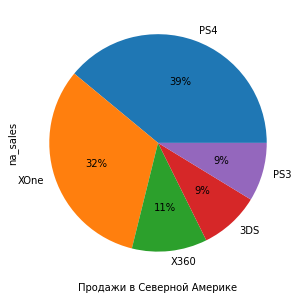

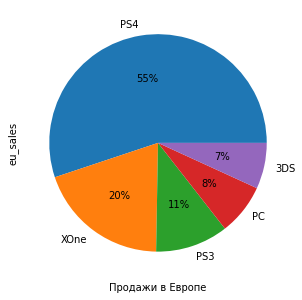

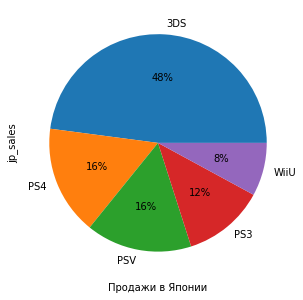

In [37]:
#круговые диаграммы 5 самых продаваемых платформ в каждом регионе:

na_platform = data_for_forecast.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_platform.plot(x='platform', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Северной Америке')
plt.show()

eu_platform = data_for_forecast.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_platform.plot(x='platform', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Европе')
plt.show()

jp_platform = data_for_forecast.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platform.plot(x='platform', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Японии')
plt.show()

В Европе и Северной Америке лидирует PS4, в Японии - 3DS (Nintendo). Обе платформы производятся в Японии, однако, скорее всего, засчет компактности и мобильности японцы предпочитают портативные платформы, нежели стационарные. Это также подтверждает то, что в платформа Wiiu (также Nintendo) встречается в топ-5 только в Японии. В топ-5 Японии не встречается стационарная платформа XOne (Xbox One), которую производит Microsoft, низкая популярность может быть связана как со стационарностью, так и с поддержкой отечественного производителя (Sony, Nintendo).

### Самые популярные жанры в каждом регионе (топ-5):

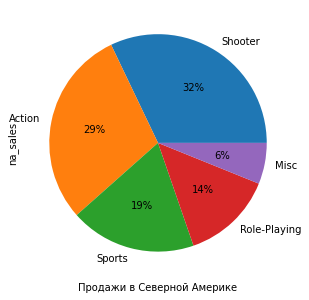

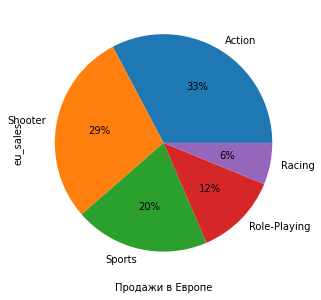

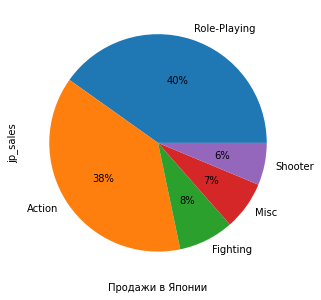

In [38]:
#круговые диаграммы 5 самых продаваемых жанров в каждом регионе:

na_genre = data_for_forecast.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_genre.plot(x='genre', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Северной Америке')
plt.show()

eu_genre = data_for_forecast.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_genre.plot(x='genre', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Европе')
plt.show()

jp_genre = data_for_forecast.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_genre.plot(x='genre', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Японии')
plt.show()

Распределение популярности жанров в Северной Америке и Европе похожи, первые три места занимают Action, Shooter и Sports, различие только в пятом месте - В СА это Misc (аркады для PC), а в Европе это Rasing (гоночные игры).

В Японии наиболее продаваемыми жанрами являются ролевые игры и жанр Экшн. Популярность ролевый игр в Японии может быть обусловлена менталитетом и желанием погрузится в виртуальный мир от первого лица и принять на себя новую роль.

### Самые часто встречающиеся возрастные ограничения в каждом регионе:

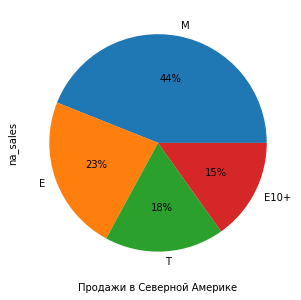

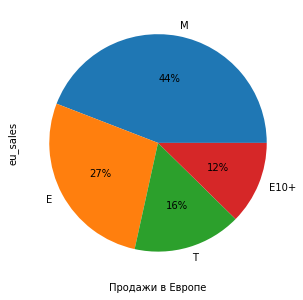

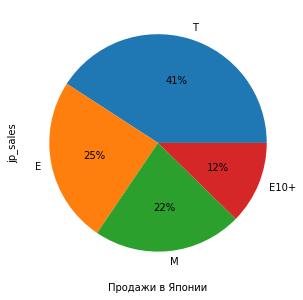

In [39]:
#круговые диаграммы 5 возрастных ограничений игр в каждом регионе:

na_rating = data_for_forecast.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
na_rating.plot(x='rating', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Северной Америке')
plt.show()

eu_rating = data_for_forecast.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_rating.plot(x='rating', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Европе')
plt.show()

jp_rating = data_for_forecast.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_rating.plot(x='genre', y='total_sales', figsize=(5, 5), kind='pie',autopct='%1.0f%%')
plt.xlabel('Продажи в Японии')
plt.show()

Как и в диаграммах выше, самые часто встречающиеся возрастные ограниченя в СА и Европе идентичны, самые частые: M (17+) и E (без возрастных ограничений). В Японии лидируют игры для подростков и старше (13+), скорее всего, популярность обусловлена большим количеством японских школьников, а также доступностью платформ в Японии, так как страна является производителем.

Из диаграмм можно сделать вывод, что возрастные огранифения влияют на продажи в регионах.

## Проверка гипотез

###  "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки данной гипотезы установим следующие гипотезы:

H0: средние рейтинги по платформам одинаковые - нулевая гипотеза, изначальное предположение \
H1: средние рейтинги по платформам разные - альтернативная гипотеза

Применим критерий alpha = 0.05 для проверки гипотез, потому что 95% вероятность верного ответа в данном вопросе нас вполне устраивает.

In [40]:
# убираем значения, которые были пропусками
new_data = data_for_forecast[data_for_forecast['user_score'] != 0]

#из всех данных выберем нужные платформы
data_xbox = new_data[new_data['platform'] == 'XOne']
data_pc = new_data[new_data['platform'] == 'PC']

#из данных по платформам выберем столбец с оценками пользователей
xbox = data_xbox['user_score']
pc = data_pc['user_score']

#критический уровень статистической значимости
alpha = .05 

#метод проверки равенства средних двух генеральных совокупностей
results = st.ttest_ind(xbox, pc) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось отвергнуть.


###  "Средние пользовательские рейтинги жанров Action и Sports разные"

Для проверки данной гипотезы установим следующие гипотезы:

H0: средние рейтинги по жанрам одинаковые - нулевая гипотеза, изначальное предположение \
H1: средние рейтинги по жанрам разные - альтернативная гипотеза

Применим критерий alpha = 0.05 для проверки гипотез, потому что 95% вероятность верного ответа в данном вопросе нас вполне устраивает.

In [41]:
#из всех данных выберем нужные жанры
data_action = new_data[new_data['genre'] == 'Action']
data_sports = new_data[new_data['genre'] == 'Sports']

#из данных по жанрам выберем столбец с оценками пользователей
action = data_action['user_score']
sports = data_sports['user_score']

# критический уровень статистической значимости
alpha = .05 

#метод проверки равенства средних двух генеральных совокупностей
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" не получилось отвергнуть.

# Общий вывод

Для того, чтобы отработать принцип работы с данными мы прошли несколько этапов:

1. **Изучили общую информацию**;

2. **Подготовили данные**:

- привели названия столбцов к единому регистру;

- обработали пропуски - удалили строки с пропусками в столбцах название, год выпуска и жанр; а также заполнили "0" пропуски в столбцах: с оценками критиков (изначально нет нулевых оценок), с оценками пользователей (изначально одна игра с нулевой оценкой); заменили аббривеатуру TDB ("To Be Determined" на "0"). В дальнейшем данные строки были исключены из анализа;

- объединили рейтинги K-A и E10+, пропуски оставили незаполненными;

- изменили типы данных в столбцах: год выпуска (на целочисленный тип), оценка критиков (на целочисленный тип), оценка пользователей (на вещественный тип);

- провели поиск полных дубликатов (отсуствовали);

- добавили столбец с суммарными продажами по регионам.

3. **Провели исследовательский анализ данных**:
- **выпуск игр в разные годы**: пик выпуска игр приходится на 2009-2010 гг, но в 2016 году наблюдается резкий рост количества выпущенных игр;


- **изменение продаж по платформам**: выбрали 10 платформ с наибольшими суммарными продажами по всем регионам, анализ показал, что средняя продолжительность "жизни" платформы составляет 8-11 лет, при чем спад значительно "плавнее", чем рост. К 2016 году самой популярной платформой являлась PS4, остальные платформы находились на спаде;


- **определили актуальный период**: на основе вышеописанных анализов, определили актуальный для прогноза период - 3 года (с 2014 по 2016 (неполный) год включительно). Дальнейшие выводу относятся только к этому периоду;


- **выбрали потенциально прибыльные платформы**: на основе данных только за актуальный период, по количеству проданных копий в разрезе годов, потенциально прибыльными платформами были определены PS4 и XOne, которые на момент 2015 года находились в точке роста;


- **построили "ящик с усами" по платформам за актуальный период**: по данным графика сделали вывод, что несмотря на большое разную длину "усов", показывающую размах количества проданных копий, наиболее частовстречающееся количество проданнных копий на наиболее популярных платформах (WiiU, XOne, PS4 и 3DS) находится на уровне около 0.2 - 0.3 млн копий;


- **определили влияние отзывов пользователей и критиков на продажи**: 1) оценка пользователей не влияет на продажи игр, 2) оценка критиков слабо влияет на продажи игр;


- **определили самые популярные жанры игр**: такими являются Shooter (в среднем 1.34 млн проданных копий на каждую игру) и Sports (0.68 млн копий на игру). 

4. **Составили портрет пользователя каждого региона**:


- **Северная Америка**: чаще всего пользуется платформой PS4 или XOne, предпочитает жанры Shooter, Action и Sports и возрастную категорию M (17+) и E (без возрастных ограничений);


 - **Европа** (портрет очень похож на пользователя СА): чаще всего пользуется платформой PS4 или XOne, предпочитает жанры Action, Shooter и Sports и возрастную категорию M (17+) и E (без возрастных ограничений);
 
 
- **Япония** (портрет сильно отличается от пользователей двух других регионов):  чаще всего пользуется платформой 3DS, предпочитает жанры Role-Playing и Action и возрастную категорию T (13+) и E (без возрастных ограничений).

5. **Проверили гипотезы**: 


- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось отвергнуть;


- "Средние пользовательские рейтинги жанров Action и Sports разные" - не получилось отвергнуть.